In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,precision_recall_curve

In [92]:
HDD= pd.read_csv('Heart_Disease_Data.csV')
print(HDD.head())
HDD.info()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

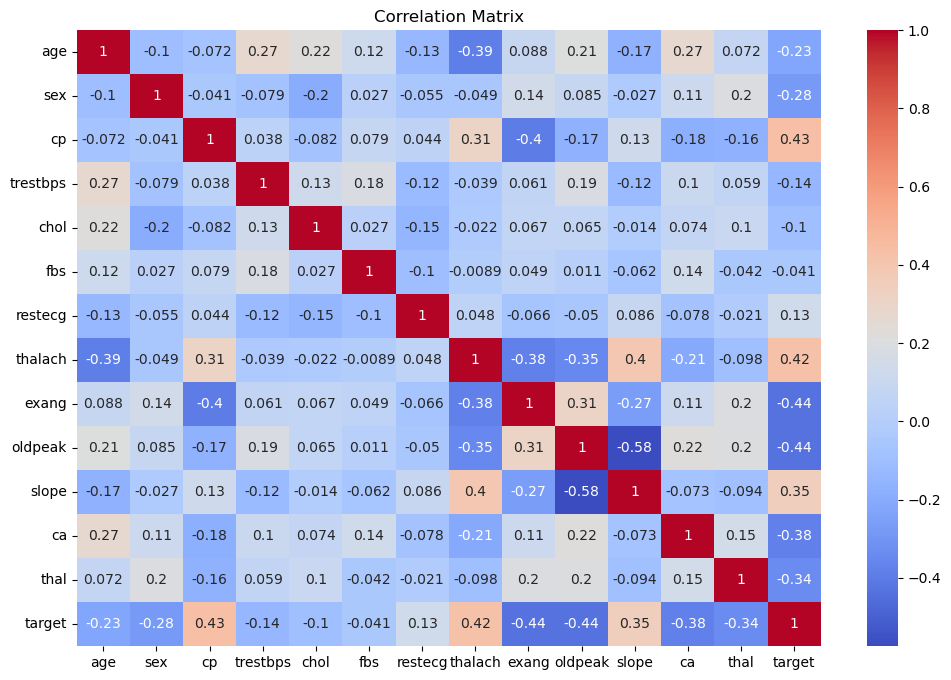

In [4]:
correlation_matrix = HDD.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix,annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

Class distribution:
 target
1    526
0    499
Name: count, dtype: int64


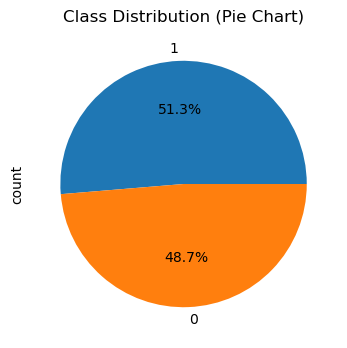

In [5]:
class_counts = HDD['target'].value_counts()
print("Class distribution:\n", class_counts)
class_counts.plot.pie(autopct='%1.1f%%', figsize=(4,4))
plt.title("Class Distribution (Pie Chart)")
plt.show()

In [6]:
x = HDD[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = HDD['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 2)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test,logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
print(f'The accuracy of Logistic Prediction Model is {logreg_accuracy * 100 : .2f}%')
print(f'The precision of the Logistic Regression Model is : {logreg_precision * 100 : .2f}%')
print(f'The recall of the Logistic Regression Model is : {logreg_recall * 100 : .2f}%')

The accuracy of Logistic Prediction Model is  85.39%
The precision of the Logistic Regression Model is :  79.64%
The recall of the Logistic Regression Model is :  92.36%


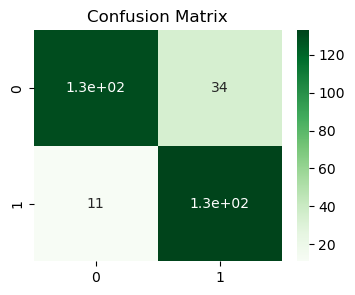

In [8]:
cm = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix')
plt.show()

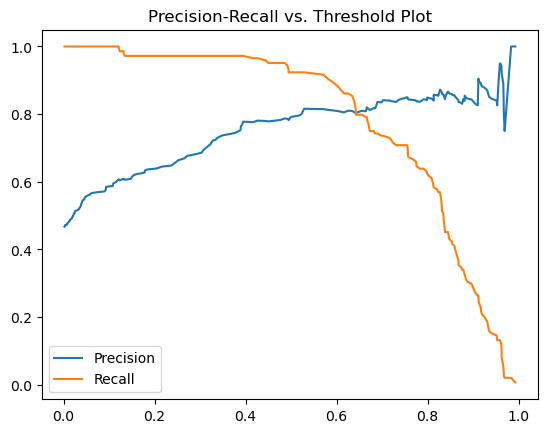

In [9]:
probability = logreg.predict_proba(x_test)[:,-1]
precision, recall, threshold = precision_recall_curve(y_test, probability)
plt.plot(threshold, precision[:-1], label = 'Precision')
plt.plot(threshold, recall[:-1], label = 'Recall')
plt.legend()
plt.title('Precision-Recall vs. Threshold Plot')
plt.show()

The precision of Logistic Regression Model with new threshold is :  80.99%
The recall of Logistic Regression Model with new threshold is :  79.86%
The accuracy of Logistic Regression Model with new threshold is :  81.82%


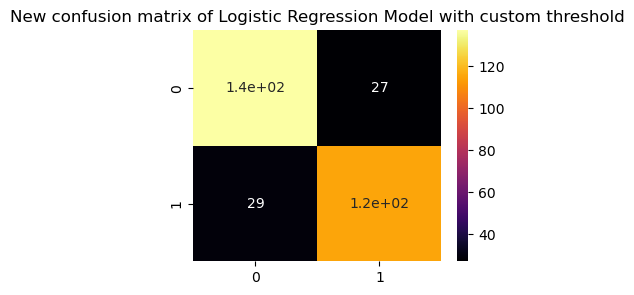

In [12]:
#I see they interact around 0.65. So, I am going to try the threshold of 0.65.
new_threshold = 0.65
new_prediction = (probability >= new_threshold).astype(int)
new_precision = precision_score(y_test, new_prediction)
new_recall = recall_score(y_test, new_prediction)
new_accuracy = accuracy_score(y_test, new_prediction)
new_lr_cm = confusion_matrix(y_test, new_prediction)
print(f'The precision of Logistic Regression Model with new threshold is : {new_precision * 100 : .2f}%')
print(f'The recall of Logistic Regression Model with new threshold is : {new_recall * 100 : .2f}%')
print(f'The accuracy of Logistic Regression Model with new threshold is : {new_accuracy * 100 : .2f}%')
plt.figure(figsize = (4,3))
sns.heatmap(new_lr_cm, annot = True, cmap = 'inferno')
plt.title('New confusion matrix of Logistic Regression Model with custom threshold')
plt.show()

The precision of Logistic Regression Model with l2 Regularization is :  79.64%
The recall value of Logistic Regression Model with l2 Regularization is :  92.36%
The accuracy of Logistic Regression Model with l2 Regularization is :  85.39%


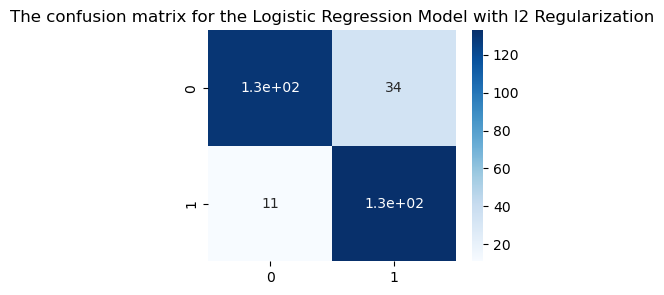

In [13]:
logreg_l2 = LogisticRegression(penalty = 'l2', C = 0.5,  solver = 'liblinear', random_state = 42)
logreg_l2.fit(x_train, y_train)
logreg_l2_pred = logreg_l2.predict(x_test)
logreg_l2_accu = accuracy_score(y_test, logreg_l2_pred)
logreg_l2_precision = precision_score(y_test, logreg_l2_pred)
logreg_l2_recall = recall_score(y_test, logreg_l2_pred)
l2_cm = confusion_matrix(y_test, logreg_l2_pred)
print(f'The precision of Logistic Regression Model with l2 Regularization is : {logreg_l2_precision * 100 : .2f}%')
print(f'The recall value of Logistic Regression Model with l2 Regularization is : {logreg_l2_recall * 100 : .2f}%')
print(f'The accuracy of Logistic Regression Model with l2 Regularization is : {logreg_l2_accu * 100 : .2f}%')
plt.figure(figsize = (4,3))
sns.heatmap(l2_cm, annot = True, cmap = 'Blues')
plt.title('The confusion matrix for the Logistic Regression Model with l2 Regularization')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
kfdt = KFold(n_splits = 5, shuffle = True, random_state = 42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling applied within each fold
    ('dtree', DecisionTreeClassifier(random_state=42, max_depth = 5, min_samples_split = 2, min_samples_leaf = 1))  # Decision Tree model
])
dtree_accuracy = cross_val_score(pipeline, x, y, cv = kfdt, scoring = 'accuracy')
dtree_f1 = cross_val_score(pipeline, x, y, cv = kfdt, scoring = 'f1')
for accuracy in dtree_accuracy:
    print(f'The accuracy of the Decision Tree Model is : {accuracy * 100 :.2f}%')
for f1_score in dtree_f1:
    print(f'The f1 score of the Decision Tree Model is : {f1_score * 100 :.2f}%')
print(f'The average acccuracy is : {dtree_accuracy.mean() * 100 :.2f}%')
print(f'The average f1 score is : {dtree_f1.mean() * 100 :.2f}%')

The accuracy of the Decision Tree Model is : 83.41%
The accuracy of the Decision Tree Model is : 87.32%
The accuracy of the Decision Tree Model is : 87.32%
The accuracy of the Decision Tree Model is : 87.80%
The accuracy of the Decision Tree Model is : 86.34%
The f1 score of the Decision Tree Model is : 84.82%
The f1 score of the Decision Tree Model is : 87.96%
The f1 score of the Decision Tree Model is : 89.34%
The f1 score of the Decision Tree Model is : 88.04%
The f1 score of the Decision Tree Model is : 86.79%
The average acccuracy is : 86.44%
The average f1 score is : 87.39%


The accuracy for the decision tree model is : 86.36%
The precision for the decision tree model is : 81.10%
The recall for the decision tree model is : 92.36%


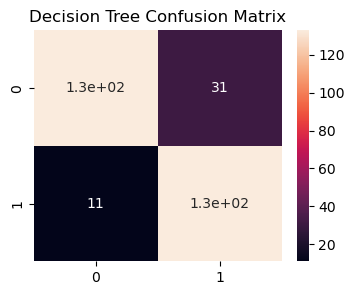

In [24]:
pipeline.fit(x_train, y_train)
dtree_pred = pipeline.predict(x_test)
dtree_accu = accuracy_score(y_test, dtree_pred)
dtree_precision = precision_score(y_test, dtree_pred)
dtree_recall = recall_score(y_test, dtree_pred)
dtree_cm = confusion_matrix(y_test, dtree_pred)
print(f'The accuracy for the decision tree model is : {dtree_accu * 100 :.2f}%')
print(f'The precision for the decision tree model is : {dtree_precision * 100 :.2f}%')
print(f'The recall for the decision tree model is : {dtree_recall * 100 :.2f}%')
plt.figure(figsize = (4,3))
sns.heatmap(dtree_cm, annot = True)
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'dtree__max_depth': [3, 5, 10, None],
    'dtree__min_samples_split': [2, 5, 10],
    'dtree__min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kfdt, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print(f'Best CV Accuracy: {grid_search.best_score_ * 100:.2f}%')

Best Parameters: {'dtree__max_depth': None, 'dtree__min_samples_leaf': 1, 'dtree__min_samples_split': 2}
Best CV Accuracy: 98.18%


The accuracy for the decision tree model is : 86.36%
The precision for the decision tree model is : 81.10%
The recall for the decision tree model is : 92.36%
The f1 score for the decision tree model is : 86.36%


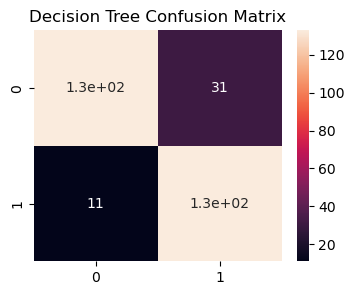

In [27]:
from sklearn.metrics import f1_score
dtree2 = DecisionTreeClassifier(random_state=42, max_depth = 5, min_samples_leaf = 1, min_samples_split = 2)
dtree2.fit(x_train, y_train)
dtree_pred2 = dtree2.predict(x_test)
dtree_accu2 = accuracy_score(y_test, dtree_pred2)
dtree_precision2 = precision_score(y_test, dtree_pred2)
dtree_recall2 = recall_score(y_test, dtree_pred2)
dtree2_f1 = f1_score(y_test, dtree_pred2)
dtree_cm2 = confusion_matrix(y_test, dtree_pred2)
print(f'The accuracy for the decision tree model is : {dtree_accu2 * 100 :.2f}%')
print(f'The precision for the decision tree model is : {dtree_precision2 * 100 :.2f}%')
print(f'The recall for the decision tree model is : {dtree_recall2 * 100 :.2f}%')
print(f'The f1 score for the decision tree model is : {dtree2_f1 * 100 :.2f}%')
plt.figure(figsize = (4,3))
sns.heatmap(dtree_cm2, annot = True)
plt.title('Decision Tree Confusion Matrix')
plt.show()

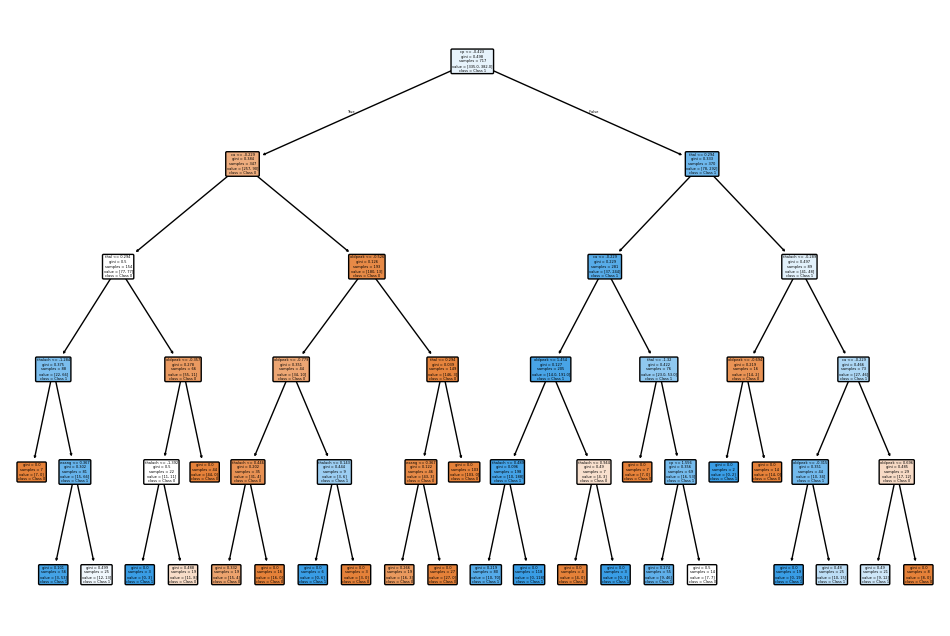

Tree Depth: 5


In [34]:
plt.figure(figsize=(12, 8))
plot_tree(dtree2, filled=True, feature_names=x.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()
print(f"Tree Depth: {dtree2.get_depth()}")

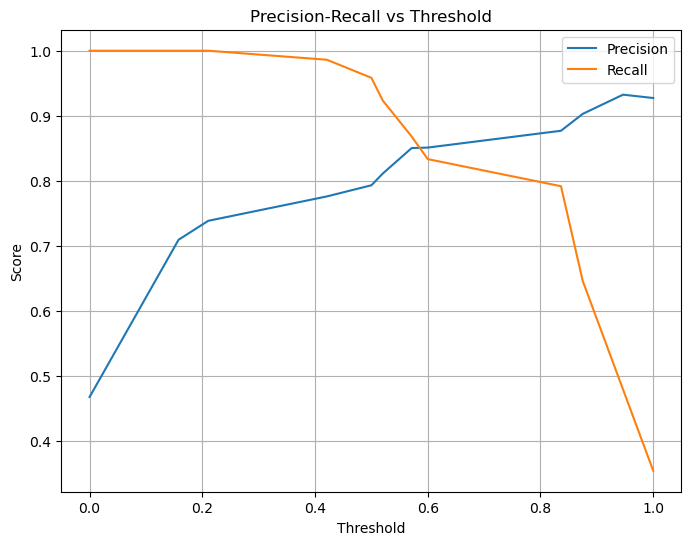

In [36]:
probas = dtree2.predict_proba(x_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, probas)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The Precision value of new model is: 85.03%
The Recall value of new model is: 86.81%
The Accuracy of new model is: 86.69%


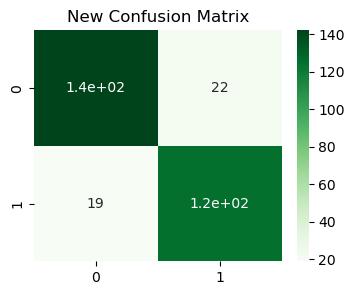

In [46]:
threshold = 0.55
y_pred_adjusted = (probas >= threshold).astype(int)
custom_precision = precision_score(y_test, y_pred_adjusted)
custom_recall = recall_score(y_test, y_pred_adjusted)
custom_accuracy = accuracy_score(y_test, y_pred_adjusted)
custom_cm = confusion_matrix(y_test, y_pred_adjusted)
print(f"The Precision value of new model is: {custom_precision * 100:.2f}%")
print(f"The Recall value of new model is: {custom_recall * 100 :.2f}%")
print(f"The Accuracy of new model is: {custom_accuracy * 100 :.2f}%")
plt.figure(figsize = (4,3))
sns.heatmap(custom_cm, annot = True, cmap = 'Greens' )
plt.title('New Confusion Matrix')
plt.show()

In [50]:
import joblib as jl

In [60]:
jl.dump(dtree2, 'decision_tree_model.pkl')
jl.dump(0.55, 'threshold.pkl')

['threshold.pkl']

In [62]:
print(x.columns)
model = jl.load('decision_tree_model.pkl')
threshold = jl.load('threshold.pkl')

Index(['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


In [90]:
def prediction(cp, thalach, exang, oldpeak, slope, ca, thal):
    input_data = [[cp, thalach, exang, oldpeak, slope, ca, thal]]
    probability = model.predict_proba(input_data)[0][1]
    chance = (probability >= threshold).astype(int)
    if chance == 1 :
        return 'Heart is retatably HEALTHY'
    else :
        return 'Heart is relatively NOT HEALTHY'
cp = int(input('(cp):'))
thalach = int(input('(thalach):'))
exang = int(input('(exang):'))
oldpeak = float(input('(oldpeak):'))
slope = int(input('(slope):'))
ca = int(input('(ca):'))
thal = int(input('thal:'))
result = prediction(cp, thalach, exang, oldpeak, slope, ca, thal)
print(result)        

(cp): 1
(thalach): 125
(exang): 1
(oldpeak): 2.6
(slope): 0
(ca): 0
thal: 3


Heart is relatively NOT HEALTHY
